In [1]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


In [2]:
total_train = pd.read_csv('data/train/train_full.csv', sep='\t', encoding = 'utf-8')
total_train['x'] = total_train.apply(lambda row: row['lemma'] + str(row['formtag']), axis=1)
train_filtered = total_train[total_train.apply(lambda x: not x['classtag'].endswith(('-','+','0')), axis=1)]

In [3]:
# для итерации, на которой достигнута нужная аккьюраси
# смотрим train - train_rest. это те семплы,которые модель отобрала для обучения

In [4]:
train_rest = pd.read_csv('training_loop/test/train_rest_after_6_step.csv', sep='\t', encoding = 'utf-8')
rest_words = train_rest['x']
selected = train_filtered[~train_filtered.x.isin(rest_words)]
len(selected)

70000

In [5]:
#слова, которые видела n_ная модель
plot_selected = selected[['classtag']].copy()
plot_selected['total_count_selected'] = [1]*len(plot_selected)
plot_selected = plot_selected.groupby(['classtag'], sort=True).aggregate(lambda x: int(sum(x)))
#plot_selected = plot_selected.sort_values(by=['total_count'], ascending=False)


In [5]:
#все слова по классам
plot_total = train_filtered[['classtag']].copy()
plot_total['total_count'] = [1]*len(train_filtered)
plot_total = plot_total.groupby(['classtag'], sort=True).aggregate(lambda x: int(sum(x)))
plot_total = plot_total.sort_values(by=['total_count'], ascending=False)

In [7]:
#plot_total = plot_total.reset_index(level=['classtag'])

In [8]:
df = pd.merge(plot_total, plot_selected, left_index=True, right_index=True)

In [9]:
df[:2]

,total_count,total_count_selected
classtag,,
м1а,68832,12414
ж8а,33732,6578


### сколько слов из каждого класса выбрала модель

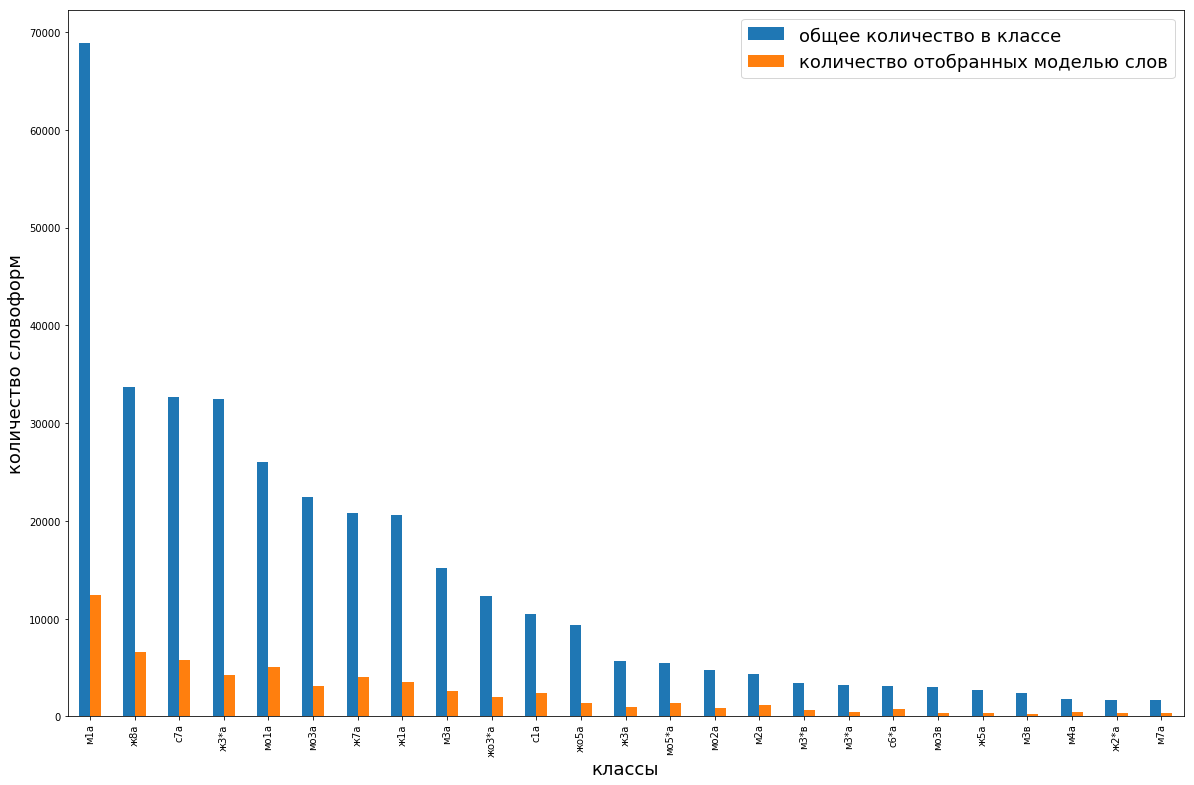

In [10]:
ax = df[[ 'total_count', 'total_count_selected']][:25].plot.bar(stacked = False, figsize = (20,13))
ax.set_xlabel('классы', fontsize=18)
ax.set_ylabel('количество словоформ', fontsize=18)
#ax.set_title('Распределение выбранных моделью слов по классам', fontsize=18)
#ax.set_ylim([0,30000])
ax.legend(loc=1, ncol=1, fontsize=18, labels = ['общее количество в классе', 'количество отобранных моделью слов'])

#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height()+2000),  rotation =45, fontsize=12, clip_on=True)

In [11]:
df['ratio'] = df['total_count_selected']/df['total_count']


In [12]:
from numpy import mean
mean(df['ratio'][:50])

0.20624477833428473

([<matplotlib.axis.YTick at 0x22a6e3aa080>,
 <a list of 10 Text yticklabel objects>)

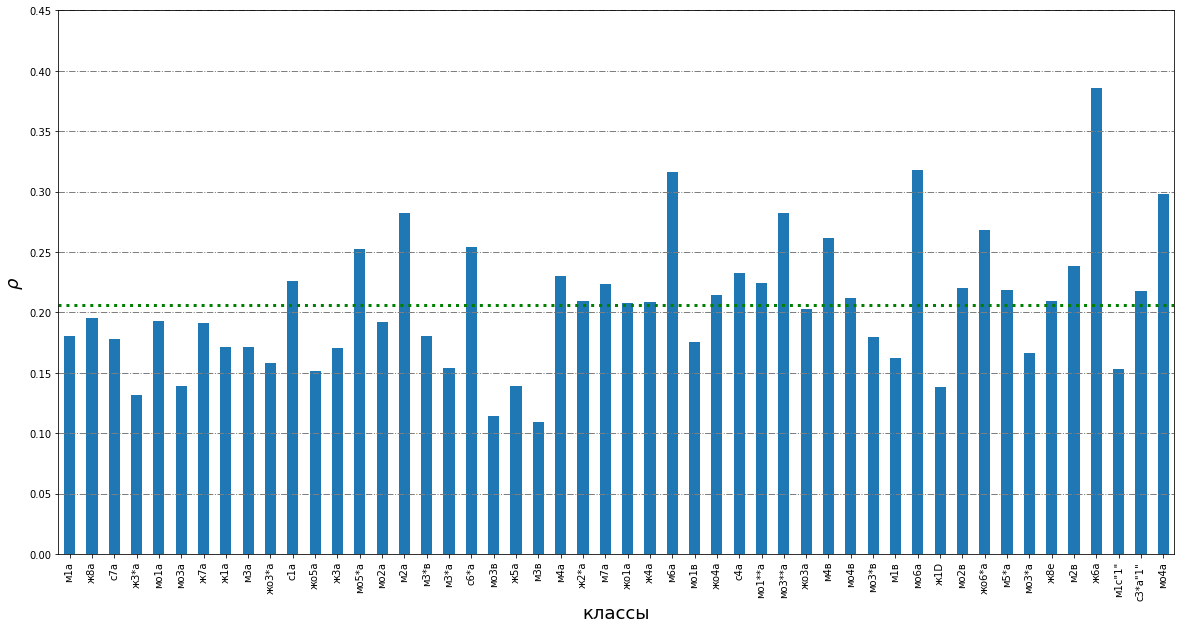

In [13]:
ax = df['ratio'][:50].plot.bar(stacked = False, figsize = (20,10))
ax.yaxis.grid(color='tab:grey', linestyle='-.', linewidth=1)
ax.set_xlabel('классы', fontsize=18)
ax.set_ylabel(r'$\rho$', fontsize=18)
mean = df['ratio'][:50].mean()
ax.axhline(y= mean,linewidth=3, color='g', linestyle=':')
plt.yticks(np.arange(0.0, 0.5, 0.05))

#ax.set_title("Отношение отобранных моделью слов ко всему классу", fontsize=18)

In [14]:
df_ratio = df.copy()
df_ratio[:50].sort_values(by = 'ratio', ascending = False)[:10].index

Index(['ж6а', 'мо6а', 'м6а', 'мо4а', 'мо3**а', 'м2а', 'жо6*а', 'м4в', 'с6*а',
       'мо5*а'],
      dtype='object', name='classtag')

In [39]:
lev_top = ['мо3**а', 'с1а', 'м2а', 'ж8а', 'с4а', 'мо2а', 'мо1**а', 'мо5*а', 'ж7а',
       'жо4а']

In [40]:
geom_top = ['ж6а', 'мо6а', 'м6а', 'мо4а', 'мо3**а', 'м2а', 'жо6*а', 'м4в', 'с6*а',
       'мо5*а']

In [41]:
lev_top = set(lev_top)
geom_top = set(geom_top)

In [42]:
lev_top & geom_top

{'м2а', 'мо3**а', 'мо5*а'}

In [15]:
seen_words_geom =  pd.read_csv('training_loop/test/seen_words_model_7.csv', sep='\t', encoding = 'utf-8')
#seen_words.loc[seen_words['classtag'] == 'мо1**а'] 
#seen_words.loc[seen_words['classtag'] == 'жо1в']
#seen_words.loc[seen_words['classtag'] == 'м1D@1']

In [107]:
seen_words_geom.loc[seen_words_geom['classtag'] == 'ж1в']

,lemma,gender,formtag,classtag,form,x
480,плева,ж,2N,ж1в,плевы,плева2N
602,кабала,ж,1G,ж1в,кабалы,кабала1G
1116,скирда,ж,2L,ж1в,скирдах,скирда2L
2737,мзда,ж,1N,ж1в,мзда,мзда1N
3554,похвала,ж,1I,ж1в,похвалой,похвала1I
3645,кобура,ж,1G,ж1в,кобуры,кобура1G
3969,брада,ж,2I,ж1в,брадами,брада2I
4313,плева,ж,1N,ж1в,плева,плева1N
6341,графа,ж,1G,ж1в,графы,графа1G
6991,люфа,ж,2A,ж1в,люфы,люфа2A


In [19]:
errors_geom = pd.read_csv('training_loop/eval/eval_model_6.csv', sep='\t', encoding = 'utf-8')

In [98]:
train_filtered[train_filtered['classtag'] == 'мо1а'][:200]

,lemma,gender,formtag,classtag,form,x
36,курощуп,мо,2G,мо1а,курощупов,курощуп2G
40,анахорет,мо,1D,мо1а,анахорету,анахорет1D
50,бизнес-партнёр,мо,2N,мо1а,бизнес-партнёры,бизнес-партнёр2N
54,башнёр,мо,2I,мо1а,башнёрами,башнёр2I
92,мешконос,мо,1N,мо1а,мешконос,мешконос1N
98,гидроид,мо,1N,мо1а,гидроид,гидроид1N
108,консерватор,мо,1A,мо1а,консерватора,консерватор1A
149,интервьюер,мо,2N,мо1а,интервьюеры,интервьюер2N
203,хэд-хантер,мо,1A,мо1а,хэд-хантера,хэд-хантер1A
212,физиократ,мо,1G,мо1а,физиократа,физиократ1G


In [105]:
train_filtered[train_filtered['lemma'] == 'гроза'][:2]

,lemma,gender,formtag,classtag,form,x


In [57]:
errors_geom[(errors_geom['classtag'] == 'мо5*а') & (errors_geom['seq2seq_eval'] == False)][:2]

,lemma,gender,formtag,classtag,form,seq2seq_predictions,seq2seq_eval
181,ариец,мо,2G,мо5*а,арийцев,арицев,False
989,удэгеец,мо,2G,мо5*а,удэгейцев,удегойцев,False


### для каждого класса: зависимость аккуратности от наполненности

In [58]:
def accuracy(data):
    a,t,f = 0,0,0
    eval_ = data['seq2seq_eval']
    values =  eval_.value_counts()
    try:
        t = values[True]
    except:
        t = 0
    try:    
        f = values[False]
    except:
        f = 0
    try:
        a = t/(len(eval_))
    except:
        a = 0
    a = round(a,4)
    #print('Total count:', len(eval_))
    #print('False:', f)
    #print('True:', t)
    #print('accuracy:',a)
    return a

In [19]:
# для каждой итерации смотрим train_rest, вычитаем его из train_filtered.
# получаем то, что видела сеть к этой итерации, groupby_selected соединяем с groupby_total,
# считаем ratio - отношение известных слов ко словам всем в классе
# вычитываем файл  eval_model_n.csv
# для каждого класса считаем accuracy по нему

In [2]:
# создаем dataframe для визуализации 40*518. строки - итерации, столбцы - класс_ratio, класс_acc 

total_test = pd.read_csv('data/test/test_full.csv', sep='\t', encoding = 'utf-8')
test_filtered = total_test[total_test.apply(lambda x: not x['classtag'].endswith(('-','+','0')), axis=1)]
test_classes = test_filtered[['classtag']].copy()
test_classes['total_count'] = [1]*len(test_classes)
test_classes = test_classes.groupby(['classtag'], sort=True).aggregate(lambda x: int(sum(x)))
test_classes = test_classes.sort_values(by=['total_count'], ascending=False) #124 класса

In [3]:
classes = test_classes.index #124
columns_ = [a + b for a in classes for b in ['_ratio','_acc']] #248
ratio_acc = pd.DataFrame(np.zeros((38, 248)),index = range(1,39), columns=columns_)

In [30]:
#загружаем ratio_acc

In [4]:
ratio_acc = pd.read_csv('data/viz/ratio_accuracy_all_classes_all_epochs.csv', sep='\t', encoding = 'utf-8')

In [67]:
ratio_acc.shape

(38, 248)

In [68]:
ratio_acc[:5]

,м1а_ratio,м1а_acc,ж8а_ratio,ж8а_acc,с7а_ratio,с7а_acc,ж3*а_ratio,ж3*а_acc,мо1а_ratio,мо1а_acc,...,жо8е_ratio,жо8е_acc,мо5а_ratio,мо5а_acc,жо6в_ratio,жо6в_acc,мо1**а@_ratio,мо1**а@_acc,с8**с_ratio,с8**с_acc
0,0.0263,0.1211,0.0257,0.0527,0.0267,0.0690,0.0267,0.1328,0.0244,0.0907,...,0.0417,0.0000,0.0278,0.0000,0.0000,0.0000,0.0,0.0,0.0278,0.0000
1,0.0526,0.3472,0.0457,0.1977,0.0464,0.3096,0.0475,0.4723,0.0535,0.2847,...,0.1042,0.0000,0.0833,0.0833,0.0278,0.0833,0.0,0.0,0.1389,0.1667
2,0.0778,0.5967,0.0776,0.5455,0.0778,0.6482,0.0653,0.7376,0.0825,0.5644,...,0.1042,0.4167,0.1250,0.4167,0.0833,0.2500,0.0,0.0,0.1667,0.1667
3,0.1044,0.6987,0.1070,0.6172,0.1014,0.7075,0.0839,0.8410,0.1097,0.6517,...,0.2292,0.4167,0.1528,0.3333,0.0833,0.4167,0.0,0.0,0.3056,0.0000
4,0.1309,0.8014,0.1391,0.7689,0.1341,0.8543,0.0970,0.8827,0.1361,0.7419,...,0.2292,0.7500,0.1667,0.5000,0.1944,0.6667,0.0,0.0,0.3611,0.1667


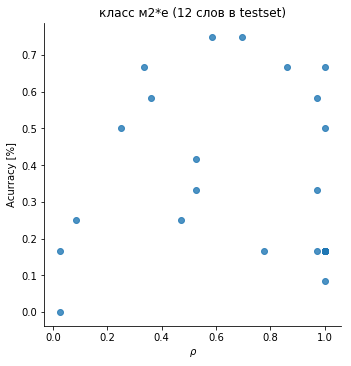

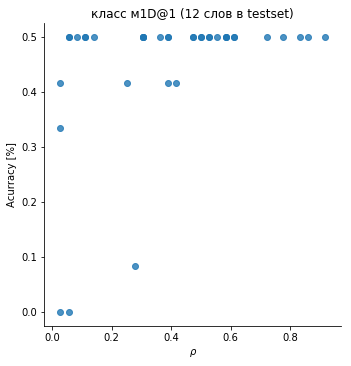

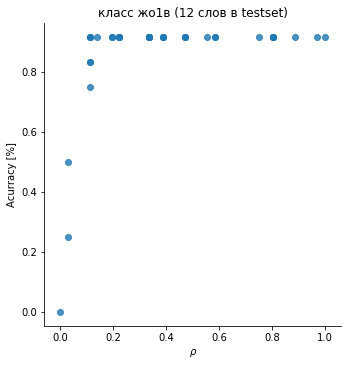

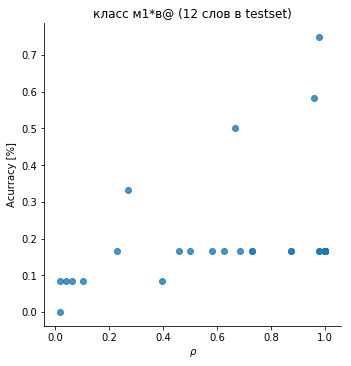

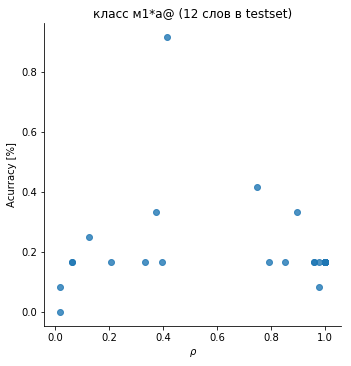

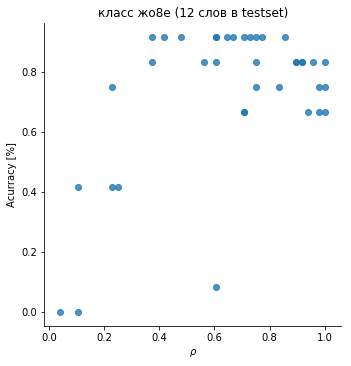

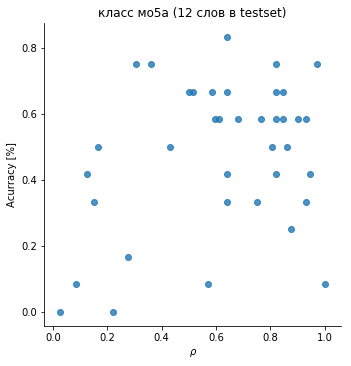

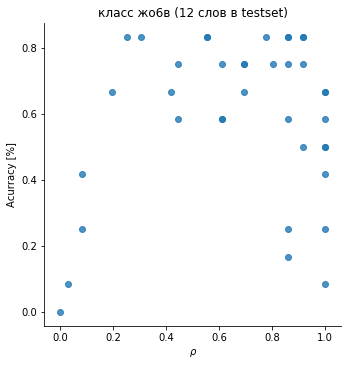

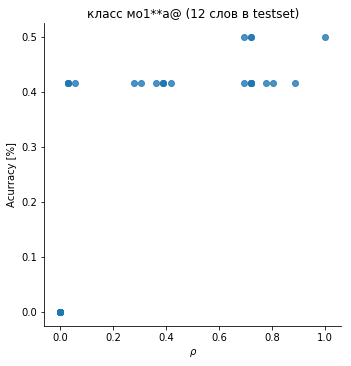

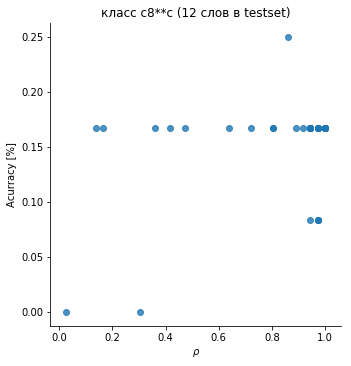

In [90]:
for class_ in classes[-10:]:
    x = class_ + '_ratio'
    y = class_ + '_acc'
    #sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 
    
    g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
    title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
    g.set(xlabel = r'$\rho$', ylabel = 'Acurracy [%]',title = title)


In [74]:

classes[:2]

Index(['м1а', 'ж8а'], dtype='object', name='classtag')

([<matplotlib.axis.YTick at 0x195a403c390>,
 <a list of 10 Text yticklabel objects>)

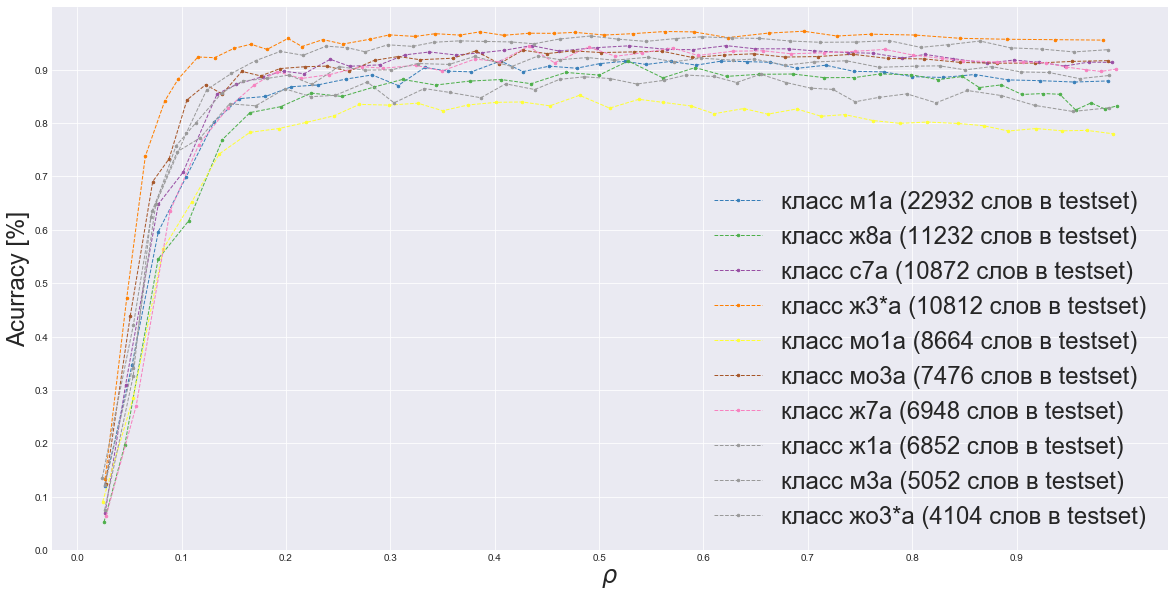

In [9]:
# style
plt.style.use('seaborn-darkgrid')
 
plt.figure(figsize=(20,10))
num = 0
#for class_ in ['мо1**а', 'жо1в']:
#for class_ in classes[:10]:
for class_ in classes[:10]:
    x = class_ + '_ratio'
    y = class_ + '_acc'
    #sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 
    
    #g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
    title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
    #g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)

    palette = plt.get_cmap('Set1')

    num += 1

    plt.plot(ratio_acc[x], ratio_acc[y], marker='.', markersize = 5, color=palette(num), linewidth=1, alpha=1.0, linestyle='dashed', label = title)
    # geometric mean
    #plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

    # Add legend
    plt.legend(loc=4, ncol=1, fontsize=24)
    # Add titles
    #plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel(r'$\rho$', fontsize=24)
    plt.ylabel( 'Acurracy [%]', fontsize=24)
#xticks = sorted(set(list(ratio_acc[x])))
#xticks = [round(y,2) for y in xticks]
plt.xticks(np.arange(0.0,1.0,0.1))
# подписи на оси y
#yticks = sorted(set(list(ratio_acc[y])))
#yticks = [round(y,2) for y in yticks]
plt.yticks(np.arange(0.0,1.0,0.1))

 

In [162]:
classes[-10:]

Index(['м2*е', 'м1D@1', 'жо1в', 'м1*в@', 'м1*а@', 'жо8е', 'мо5а', 'жо6в',
       'мо1**а@', 'с8**с'],
      dtype='object', name='classtag')

In [104]:
test_classes.loc['ж1в','total_count']

108

([<matplotlib.axis.YTick at 0x22a06acd9b0>,
 <a list of 10 Text yticklabel objects>)

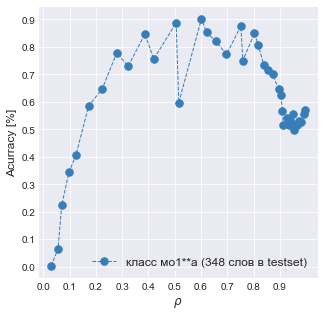

In [101]:
plt.figure(figsize=(5,5))
num = 0
#for class_ in ['мо1**а', 'жо1в']:
class_ = 'мо1**а' #селянин - селяне
x = class_ + '_ratio'
y = class_ + '_acc'
#sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 

#g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
#g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)

palette = plt.get_cmap('Set1')

num += 1

plt.plot(ratio_acc[x], ratio_acc[y], marker='.', markersize = 15, color=palette(num), linewidth=1, alpha=1.0, linestyle='dashed', label = title)
# geometric mean
#plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

# Add legend
plt.legend(loc=4, ncol=1, fontsize=12)
# Add titles
#plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel(r'$\rho$', fontsize=12)
plt.ylabel( 'Acurracy [%]', fontsize=12)
#xticks = sorted(set(list(ratio_acc[x])))
#xticks = [round(y,2) for y in xticks]
plt.xticks(np.arange(0.0,1.0,0.1))
# подписи на оси y
#yticks = sorted(set(list(ratio_acc[y])))
#yticks = [round(y,2) for y in yticks]
plt.yticks(np.arange(0.0,1.0,0.1))

([<matplotlib.axis.YTick at 0x290081d2438>,
 <a list of 10 Text yticklabel objects>)

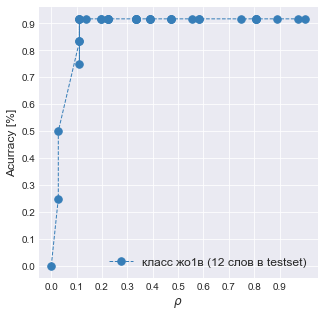

In [9]:
# style
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(5,5))
num = 0
#for class_ in ['мо1**а', 'жо1в']:
class_ = 'жо1в' #гюрза гюрз
x = class_ + '_ratio'
y = class_ + '_acc'
#sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 

#g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
#g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)

palette = plt.get_cmap('Set1')

num += 1

plt.plot(ratio_acc[x], ratio_acc[y], marker='.', markersize = 15, color=palette(num), linewidth=1, alpha=1.0, linestyle='dashed', label = title)
# geometric mean
#plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

# Add legend
plt.legend(loc=4, ncol=1, fontsize=12)
# Add titles
#plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel(r'$\rho$', fontsize=12)
plt.ylabel( 'Acurracy [%]', fontsize=12)
#xticks = sorted(set(list(ratio_acc[x])))
#xticks = [round(y,2) for y in xticks]
plt.xticks(np.arange(0.0,1.0,0.1))
# подписи на оси y
#yticks = sorted(set(list(ratio_acc[y])))
#yticks = [round(y,2) for y in yticks]
plt.yticks(np.arange(0.0,1.0,0.1))

([<matplotlib.axis.YTick at 0x22a04efe780>,
 <a list of 10 Text yticklabel objects>)

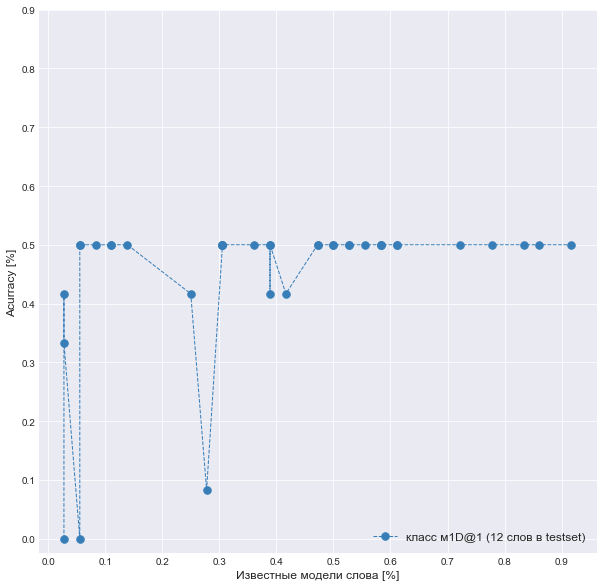

In [95]:

plt.figure(figsize=(10,10))
num = 0
#for class_ in ['мо1**а', 'жо1в']:
class_ = 'м1D@1' #кол-колья прут-прутья лист-листья
x = class_ + '_ratio'
y = class_ + '_acc'
#sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 

#g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
#g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)

palette = plt.get_cmap('Set1')

num += 1

plt.plot(ratio_acc[x], ratio_acc[y], marker='.', markersize = 15, color=palette(num), linewidth=1, alpha=1.0, linestyle='dashed', label = title)
# geometric mean
#plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

# Add legend
plt.legend(loc=4, ncol=1, fontsize=12)
# Add titles
#plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Известные модели слова [%]", fontsize=12)
plt.ylabel( 'Acurracy [%]', fontsize=12)
#xticks = sorted(set(list(ratio_acc[x])))
#xticks = [round(y,2) for y in xticks]
plt.xticks(np.arange(0.0,1.0,0.1))
# подписи на оси y
#yticks = sorted(set(list(ratio_acc[y])))
#yticks = [round(y,2) for y in yticks]
plt.yticks(np.arange(0.0,1.0,0.1))

([<matplotlib.axis.YTick at 0x290081d2630>,
 <a list of 10 Text yticklabel objects>)

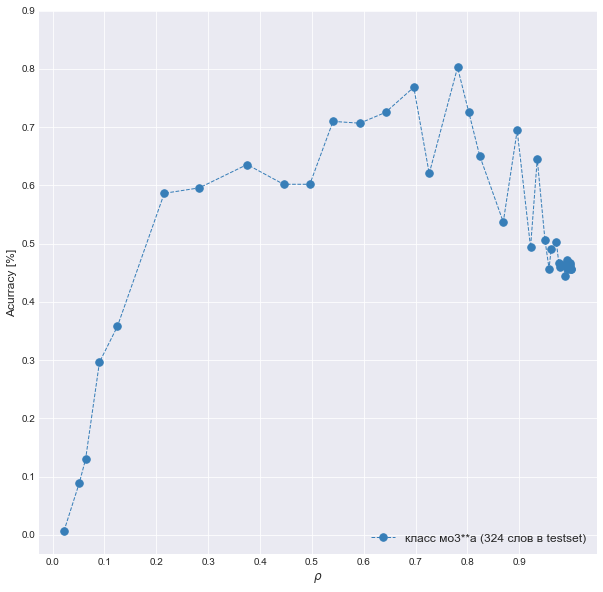

In [10]:
# style
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
num = 0
#for class_ in ['мо1**а', 'жо1в']:
class_ = 'мо3**а' # мышонок мышата
x = class_ + '_ratio'
y = class_ + '_acc'
#sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 

#g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
#g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)

palette = plt.get_cmap('Set1')

num += 1

plt.plot(ratio_acc[x], ratio_acc[y], marker='.', markersize = 15, color=palette(num), linewidth=1, alpha=1.0, linestyle='dashed', label = title)
# geometric mean
#plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

# Add legend
plt.legend(loc=4, ncol=1, fontsize=12)
# Add titles
#plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel(r'$\rho$', fontsize=12)
plt.ylabel( 'Acurracy [%]', fontsize=12)
#xticks = sorted(set(list(ratio_acc[x])))
#xticks = [round(y,2) for y in xticks]
plt.xticks(np.arange(0.0,1.0,0.1))
# подписи на оси y
#yticks = sorted(set(list(ratio_acc[y])))
#yticks = [round(y,2) for y in yticks]
plt.yticks(np.arange(0.0,1.0,0.1))

In [171]:
#мо1**а селянин - селяне  1052
#жо1в гюрза -гюрз 29
#м1D@1 прут - прутья 28
seen_words =  pd.read_csv('training_loop/test/seen_words_model_35.csv', sep='\t', encoding = 'utf-8')
#seen_words.loc[seen_words['classtag'] == 'мо1**а'] 
#seen_words.loc[seen_words['classtag'] == 'жо1в']
#seen_words.loc[seen_words['classtag'] == 'м1D@1']


29

### аккуратность модели на каждом классе и наполненность классов (ratio = отобранные/все)

In [42]:
ratio_acc_18 = ratio_acc.loc[18] #получаем тип series
ratio_acc_18 = pd.DataFrame([ratio_acc_18])#делаем dataframe
ratio_acc_18 = ratio_acc_18.transpose()
ratio_acc_18.reset_index(level=0, inplace=True)
ratio_acc_18['type'] = ratio_acc_18.apply(lambda x: x['index'].split('_')[1], axis=1)
ratio_acc_18['index'] = ratio_acc_18.apply(lambda x: x['index'].split('_')[0], axis=1)

In [57]:
ratio_acc_18[:3]

,index,18,type
0,м1а,0.4522,ratio
1,м1а,0.9063,acc
2,ж8а,0.5279,ratio


In [67]:
ratio_acc_18_wide = ratio_acc_18.pivot('index', 'type', 18) #делаем колонки ratio и shape


In [68]:
ratio_acc_18_wide[:5]

type,acc,ratio
index,,
ж1*D,0.6389,0.7870
ж1*D@,0.0000,0.2500
ж1*а,0.9167,0.5208
ж1*в,0.0000,0.2500
ж1*в@,0.0000,0.7500


In [92]:
plot_ratio_acc_18_wide = pd.merge(plot_total, ratio_acc_18_wide, left_index=True, right_index=True)

In [93]:
plot_ratio_acc_18_wide.shape

(259, 3)

In [ ]:
# убираем те классы, которых не было в тест сете (по ним нулевая аккьюраси)

In [94]:
total_test = pd.read_csv('data/test/test_full.csv', sep='\t', encoding = 'utf-8')
test_filtered = total_test[total_test.apply(lambda x: not x['classtag'].endswith(('-','+','0')), axis=1)]
test_classes = set(test_filtered['classtag']) #124

In [95]:
plot_ratio_acc_18_wide = plot_ratio_acc_18_wide[plot_ratio_acc_18_wide.index.isin(test_classes)]

In [96]:
plot_ratio_acc_18_wide.shape

(124, 3)

Text(0.5,1,'"Аккуратность" модели по каждому классу и процент отобранных слов из класса')

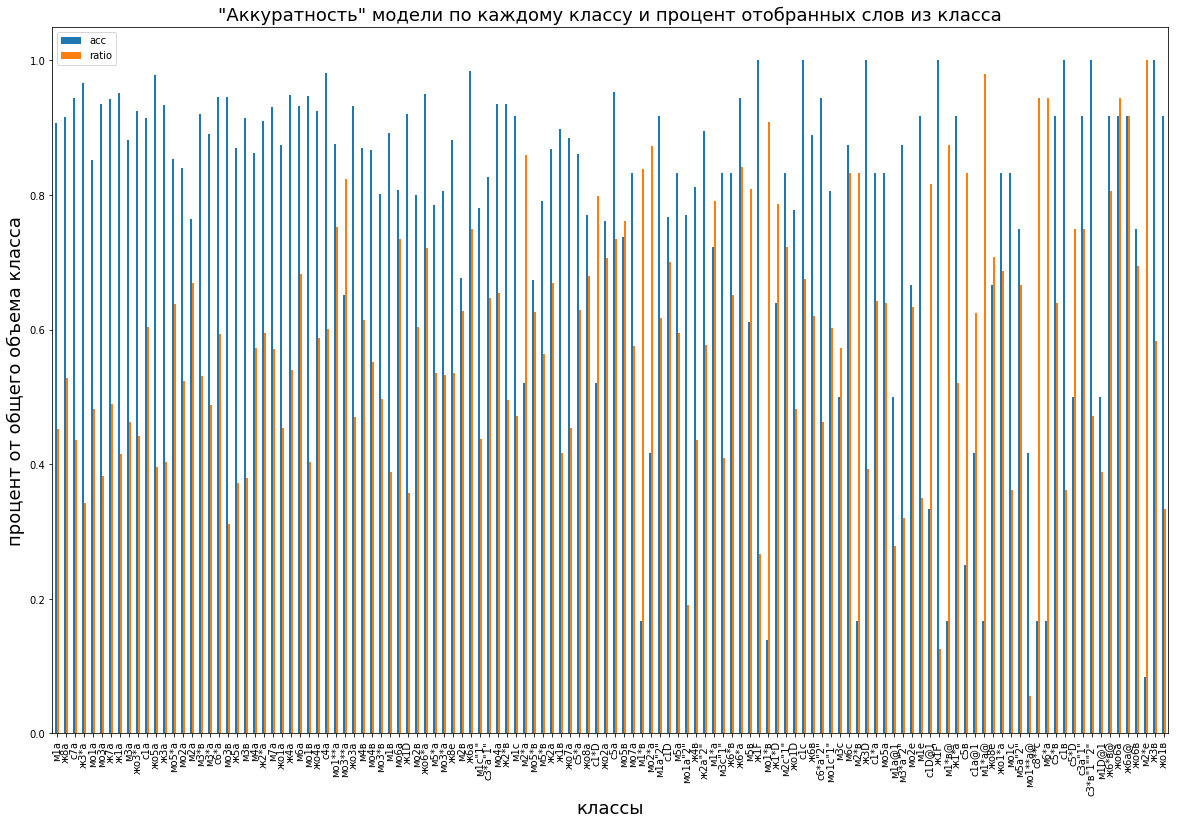

In [97]:
ax = plot_ratio_acc_18_wide[[ 'acc', 'ratio']][:200].plot.bar(stacked = False, figsize = (20,13))
ax.set_xlabel('классы', fontsize=18)
ax.set_ylabel('процент от общего объема класса', fontsize=18)
ax.set_title('"Аккуратность" модели по каждому классу и процент отобранных слов из класса', fontsize=18)
#ax.set_ylim([0,30000])
#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height()+2000),  rotation =45, fontsize=12, clip_on=True)

# сравнение Левенштейна и геометрического среднего

In [4]:
geom_mean = pd.read_csv('training_loop/eval/eval_true_result.csv', sep='\t', encoding = 'utf-8', names = ['iter','geom_acc'])

In [5]:
lev = pd.read_csv('training_loop/eval/lev/eval_true_result.csv', sep='\t', encoding = 'utf-8', names = ['iter','lev_acc'])

In [6]:
active_plot = pd.merge(geom_mean, lev)

([<matplotlib.axis.YTick at 0x1b8d61430b8>,
 <a list of 19 Text yticklabel objects>)

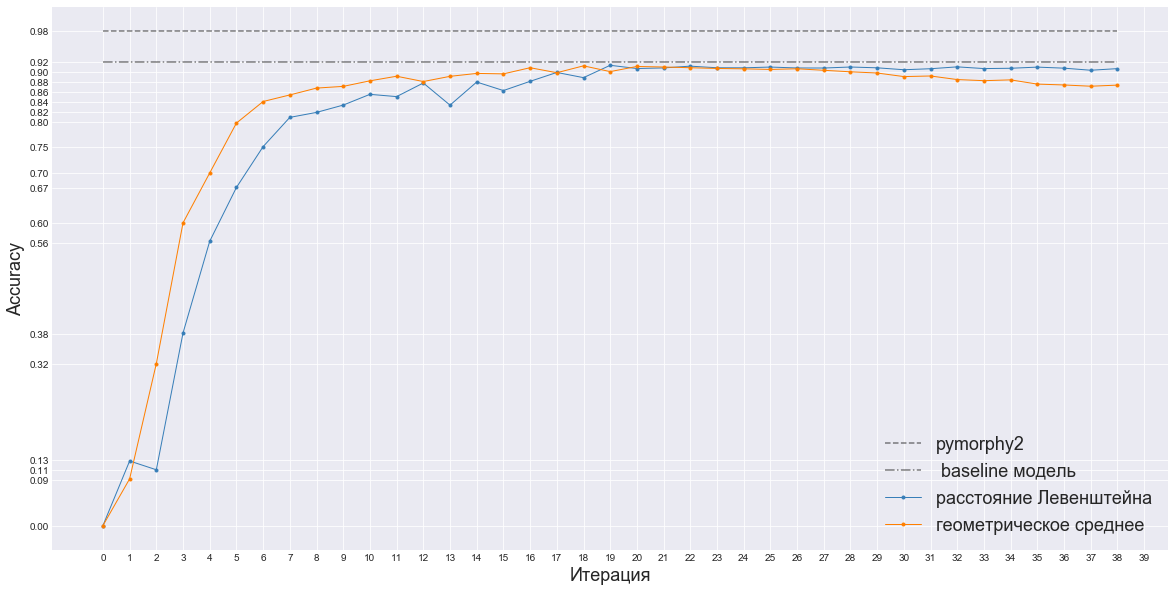

In [17]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

plt.figure(figsize=(20,10))
    
# pymorphy2 
horiz_line_data = np.array([0.98 for i in range(len(active_plot['iter']))])
plt.plot(active_plot['iter'], horiz_line_data, 'k--', alpha=0.5, label = "pymorphy2") 

# baseline model
horiz_line_data = np.array([0.92 for i in range(len(active_plot['iter']))])
plt.plot(active_plot['iter'], horiz_line_data, 'k-.', alpha=0.5, label = " baseline модель") 

# levenshtein
plt.plot(active_plot['iter'], active_plot['lev_acc'], marker='.', color=palette(1), linewidth=1, alpha=1.0, label = 'расстояние Левенштейна')
 # geometric mean
plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

# Add legend
plt.legend(loc=4, ncol=1, fontsize=18)
 
# Add titles
#plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Итерация", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xticks(range(0, 40, 1))
# подписи на оси y
yticks = sorted(set(list(active_plot['lev_acc']) + list(active_plot['geom_acc'])))
yticks = [round(y,2) for y in yticks]
yticks = [round(y,2) for y in yticks if y<0.8 or (y*100)%2 == 0.0]
yticks = yticks + [0.92,0.98]
yticks = sorted(set(yticks))
plt.yticks(yticks)
 

In [18]:
active_plot

,iter,geom_acc,lev_acc
0,0,0.0000,0.0000
1,1,0.0927,0.1281
2,2,0.3212,0.1107
3,3,0.6004,0.3820
4,4,0.6993,0.5639
5,5,0.7982,0.6705
6,6,0.8410,0.7515
7,7,0.8540,0.8095
8,8,0.8676,0.8194
9,9,0.8710,0.8339
